In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df = df.reset_index()

In [3]:
df.head()

,index,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,0,1503960366,4/12/2016,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1,1503960366,4/13/2016,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,2,1503960366,4/14/2016,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,3,1503960366,4/15/2016,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,4,1503960366,4/16/2016,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## The three most correlated variables are: TotalDistance, Very Active Minutes, TotalSteps. 

## Create a linear regression object       

In [4]:
model = LinearRegression()

## Transform log(predictor) and log(y-variable)    

In [5]:
df['TotalDistance_log'] = np.log(df['TotalDistance'].values.reshape(-1,1))
df['VeryActiveMinutes_log'] = np.log(df['VeryActiveMinutes'].values.reshape(-1,1))
df['TotalSteps_log'] = np.log(df['TotalSteps'].values.reshape(-1,1))
df['Calories_log'] = np.log(df['Calories'].values.reshape(-1,1))
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


# Total Distance

## Train the model using the training sets and predict values of log(y-variable)   


In [6]:
X = df['TotalDistance_log'].values.reshape(-1,1)
y = df['Calories_log'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)

## Plot a scatterplot of log(y-variable) vs. log(predictor)      

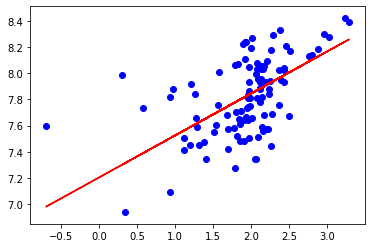

In [7]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, predicted, color='red')
plt.show()

## Calculate MSE (mean square error) and R^2

In [8]:
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, predicted) ) 
print("R^2 Score:", metrics.r2_score(Y_test, predicted))

Mean Squared Error: 0.06147425426524259
R^2 Score: 0.2696674259346218


# Very Active Minutes

## Train the model using the training sets and predict values of log(y-variable)   


In [9]:
X = df['VeryActiveMinutes_log'].values.reshape(-1,1)
y = df['Calories_log'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)

## Plot a scatterplot of log(y-variable) vs. log(predictor)      

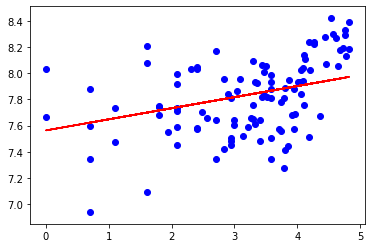

In [10]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, predicted, color='red')
plt.show()

## Calculate MSE (mean square error) and R^2

In [11]:
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, predicted) ) 
print("R^2 Score :", metrics.r2_score(Y_test, predicted))

Mean Squared Error: 0.06880662371212647
R^2 Score : 0.18255667825420985


# TotalSteps

## Train the model using the training sets and predict values of log(y-variable)   


In [12]:
X = df['TotalSteps_log'].values.reshape(-1,1)
y = df['Calories_log'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)

## Plot a scatterplot of log(y-variable) vs. log(predictor)      

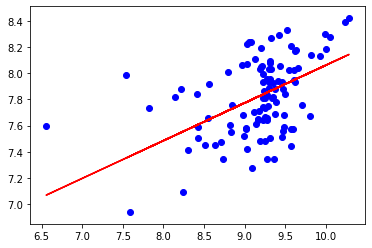

In [13]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, predicted, color='red')
plt.show()

## Calculate MSE (mean square error) and R^2

In [14]:
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, predicted) ) 
print("R^2 Score:", metrics.r2_score(Y_test, predicted))

Mean Squared Error: 0.06785941531834543
R^2 Score: 0.19380979799799136
